<a href="https://www.kaggle.com/code/jaydhakate/sentiment-analysis-on-imdb-dataset?scriptVersionId=141041229" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


# Loading Dataset

In [2]:
data = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Taking care of missing values

In [4]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

# Taking care of duplicate values

In [5]:
data_duplicate = data.duplicated().any()
data_duplicate

True

In [6]:
data = data.drop_duplicates()

In [7]:
data.shape

(49582, 2)

# Count words

In [8]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [9]:
data['word count'] = data['review'].apply(no_of_words)

/tmp/ipykernel_20/3833410074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['word count'] = data['review'].apply(no_of_words)


In [10]:
data.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


# Review Distribution

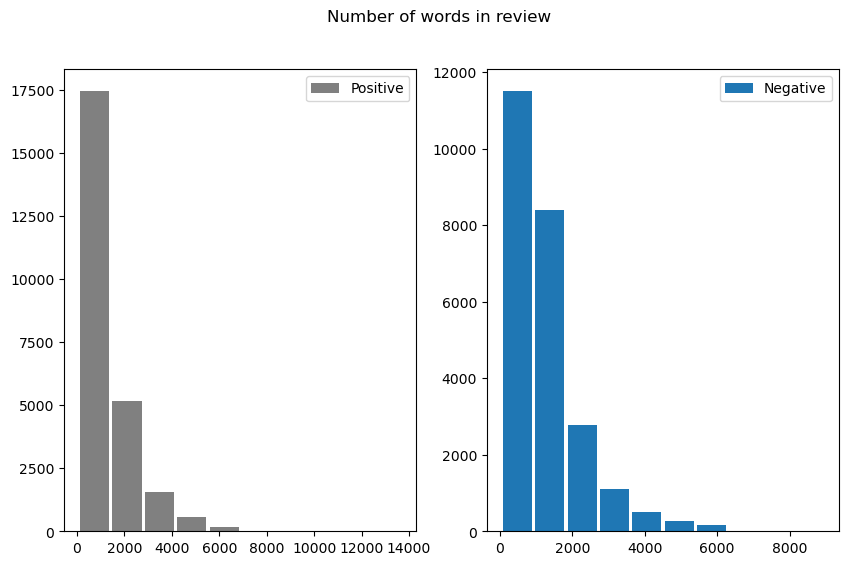

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(data[data['sentiment'] == 'positive']['review'].str.len(), label ='Positive',color = 'grey', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(data[data['sentiment'] == 'negative']['review'].str.len(), label ='Negative', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [12]:
data.sentiment.replace("positive", 1, inplace=True)
data.sentiment.replace("negative", 2, inplace=True)
data.head()

/tmp/ipykernel_20/932401087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sentiment.replace("positive", 1, inplace=True)
/tmp/ipykernel_20/932401087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sentiment.replace("negative", 2, inplace=True)


,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


# Preprocessing

In [13]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [14]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r'<br />', '', text)
    text = re.sub(r'http\S+|www\S+|http\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_text = [w for w in text_tokens if w not in stop_words]
    return " ".join(filtered_text)
data.review = data['review'].apply(data_processing)

/tmp/ipykernel_20/2972469004.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.review = data['review'].apply(data_processing)


# Positive and Negative Reviews

In [15]:
pos_reviews = data[data.sentiment == 1]
pos_reviews.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
4,petter matteis love time money visually stunni...,1,230
5,probably alltime favorite movie story selfless...,1,119


# Most Frequent Words

In [16]:
from wordcloud import WordCloud

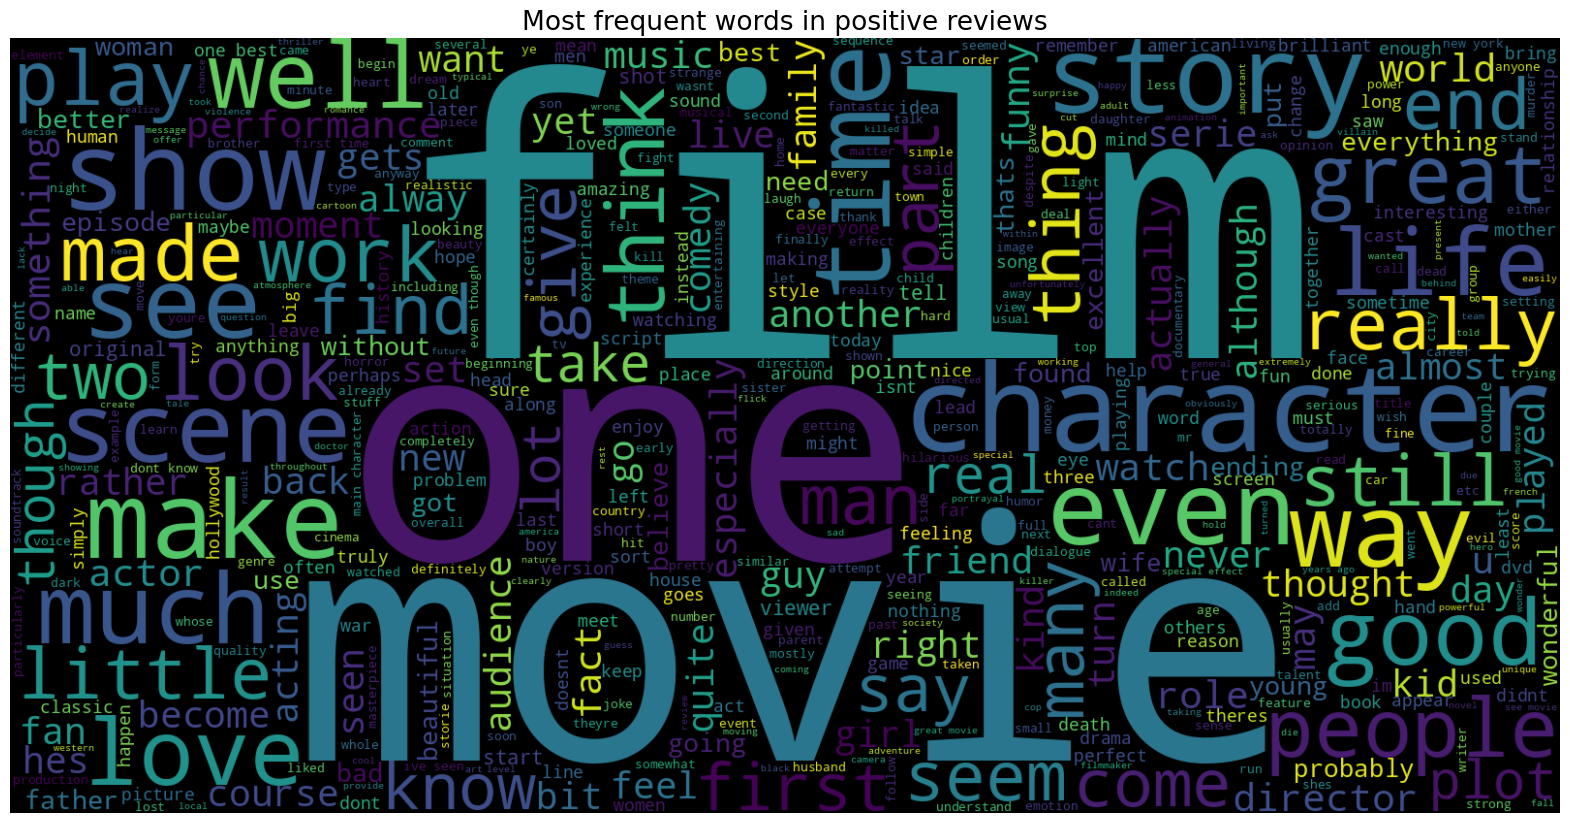

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load your positive reviews data
# pos_reviews = ... (load your data here)

# Assuming you have a list of words in pos_reviews['review']
# You need to replace this with your actual data source
if 'review' in pos_reviews:
    text = ' '.join([word for word in pos_reviews['review']])

    if len(text) > 0:  # Check if there's at least one word
        plt.figure(figsize=(20, 15))
        wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Most frequent words in positive reviews', fontsize=19)
        plt.show()
    else:
        print("No words found in the positive reviews data.")
else:
    print("Review data not found in the positive reviews data.")


In [18]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 39285),
 ('movie', 35836),
 ('one', 25621),
 ('like', 16999),
 ('good', 14286),
 ('great', 12570),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10933),
 ('really', 10641),
 ('also', 10517),
 ('would', 10320),
 ('even', 9319),
 ('much', 8971)]

In [19]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,film,39285
1,movie,35836
2,one,25621
3,like,16999
4,good,14286


In [20]:
import plotly.express as px
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color = 'word')

In [21]:
neg_reviews = data[data.sentiment == 2]
neg_reviews.head()

,review,sentiment,word count
3,basically theres family little boy jake thinks...,2,138
7,show amazing fresh innovative idea 70s first a...,2,174
8,encouraged positive comments film looking forw...,2,130
10,phil alien one quirky films humour based aroun...,2,96
11,saw movie 12 came recall scariest scene big bi...,2,180


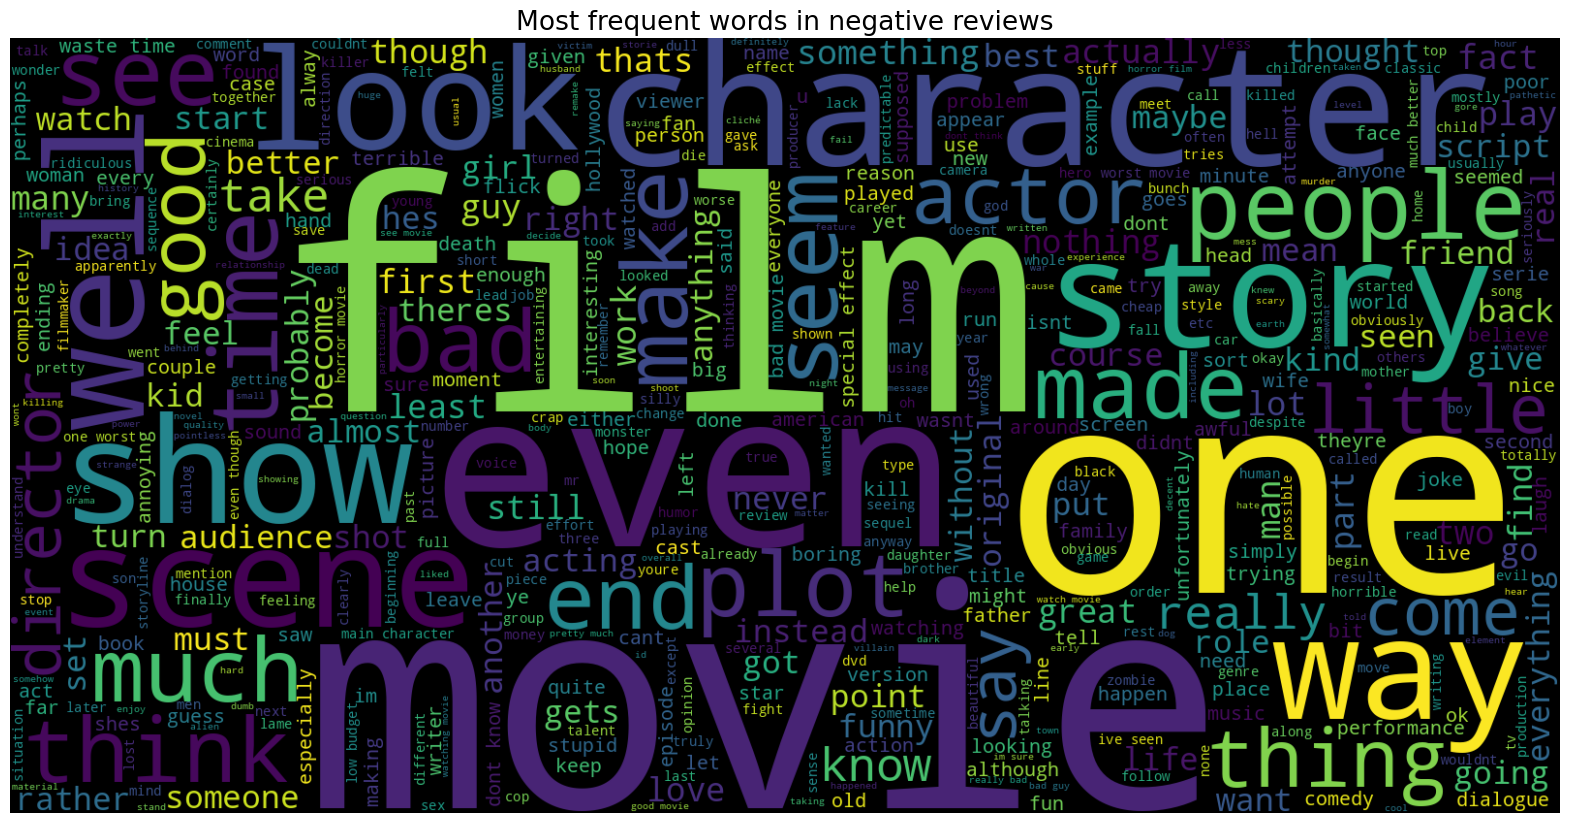

In [22]:
if 'review' in neg_reviews:
    text = ' '.join([word for word in neg_reviews['review']])

    if len(text) > 0:  # Check if there's at least one word
        plt.figure(figsize=(20, 15))
        wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Most frequent words in negative reviews', fontsize=19)
        plt.show()
    else:
        print("No words found in the negative reviews data.")
else:
    print("Review data not found in the negative reviews data.")


In [23]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 47011),
 ('film', 34651),
 ('one', 24364),
 ('like', 21509),
 ('even', 14761),
 ('good', 13997),
 ('bad', 13906),
 ('would', 13483),
 ('really', 12084),
 ('time', 11350),
 ('see', 10413),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9759),
 ('story', 9564)]

In [24]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,movie,47011
1,film,34651
2,one,24364
3,like,21509
4,even,14761


In [25]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color = 'word')

# Factorizing the Data

In [26]:
X = data['review']
Y =data['sentiment']

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
X = vect.fit_transform(data['review'])

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [29]:
print("Size of x_train: ",x_train.shape)
print("Size of y_train: ",y_train.shape)
print("Size of x_test: ",x_test.shape)
print("Size of y_test: ",y_test.shape)

Size of x_train:  (34707, 221700)
Size of y_train:  (34707,)
Size of x_test:  (14875, 221700)
Size of y_test:  (14875,)


# Importing the Models and Logistic Regression Model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [31]:
LogR = LogisticRegression()
LogR.fit(x_train, y_train)
LogR_pred = LogR.predict(x_test)
LogR_acc = accuracy_score(LogR_pred,y_test)
print("Test accuracy: {:.2f}%".format(LogR_acc*100))

Test accuracy: 89.40%


In [32]:
print(confusion_matrix(y_test, LogR_pred))
print("\n")
print(classification_report(y_test, LogR_pred))

[[6780  691]
 [ 886 6518]]


              precision    recall  f1-score   support

           1       0.88      0.91      0.90      7471
           2       0.90      0.88      0.89      7404

    accuracy                           0.89     14875
   macro avg       0.89      0.89      0.89     14875
weighted avg       0.89      0.89      0.89     14875



In [33]:
Mnb = MultinomialNB()
Mnb.fit(x_train, y_train)
Mnb_pred = Mnb.predict(x_test)
Mnb_acc = accuracy_score(Mnb_pred,y_test)
print("Test accuracy: {:.2f}%".format(Mnb_acc*100))

Test accuracy: 86.38%


In [34]:
print(confusion_matrix(y_test, Mnb_pred))
print("\n")
print(classification_report(y_test, Mnb_pred))

[[6396 1075]
 [ 951 6453]]


              precision    recall  f1-score   support

           1       0.87      0.86      0.86      7471
           2       0.86      0.87      0.86      7404

    accuracy                           0.86     14875
   macro avg       0.86      0.86      0.86     14875
weighted avg       0.86      0.86      0.86     14875



In [35]:
Svc = LinearSVC()
Svc.fit(x_train, y_train)
Svc_pred = Svc.predict(x_test)
Svc_acc = accuracy_score(Svc_pred,y_test)
print("Test accuracy: {:.2f}%".format(Svc_acc*100))

Test accuracy: 89.74%


In [36]:
print(confusion_matrix(y_test, Svc_pred))
print("\n")
print(classification_report(y_test, Svc_pred))

[[6778  693]
 [ 833 6571]]


              precision    recall  f1-score   support

           1       0.89      0.91      0.90      7471
           2       0.90      0.89      0.90      7404

    accuracy                           0.90     14875
   macro avg       0.90      0.90      0.90     14875
weighted avg       0.90      0.90      0.90     14875



# Conclusion

The main motive behind this project was to construct a sentiment analysis model that will help us to get a better understanding of movie reviews that we have collected, We compared the results of the classifiers - Naive Bayes, Logistic Regression and Support Vector Classifer (SVC). For Evaluation, we observed the accuracy provided by each model. By evaluating the models, we found out that SCV gives us
the highest accuracy score of 89.74%.
